In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
train_df=pd.read_csv("train.csv") 

test_df=pd.read_csv("test.csv")
combine=[train_df,test_df]

### combining the both the dataset in to variable x
bothdata=pd.concat(combine,sort=True)

 Q9: Can you observe significant correlation (average survivied ratio>0.5) 
     among the group of Pclass=1 and Survived? 
     If Pclass has significant correlation with Survivied, 
     we should include this feature in the predictive model. 
     Based on your computation, will you include this feature in the predictive model?

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


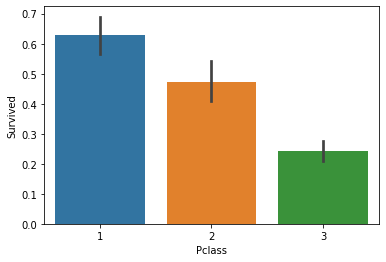

In [2]:
#solution
sns.barplot(x='Pclass',y='Survived',data=bothdata)

train_df[['Pclass', 'Survived']].groupby(['Pclass']).mean()


# Solution 
Yes the above plot confirms that Pclass=1 has highest rate of survival so we should 
this feature in the predictive model 

Q10: Are Women (Sex=female) were more likely to have survived?

,Sex,Survived
0,female,0.742038
1,male,0.188908


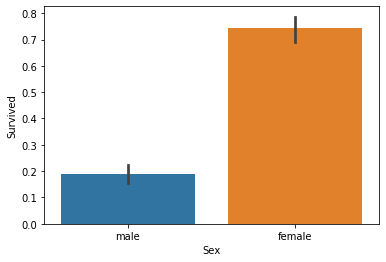

In [3]:
#solution:
sns.barplot(x="Sex",y="Survived", data=bothdata)

bothdata[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

# Solution :
from the plot is clear that women have a survival rate of more then 70% 
so Women (Sex=female) were more likely to have survived


Q11: Let us start by understanding correlations between a numeric feature (Age) 
    and our predictive goal (Survived). A histogram chart is useful for analyzing continuous numerical 
    variables like Age where banding or ranges will help identify useful patterns. 
    The histogram can indicate distribution of samples using automatically defined bins or equally ranged bands. 
    This helps us answer questions relating to specific bands (e.g., infants, old). 
    Please plot the histogram plots between ages and Survived (Figure 1 is an example), 
    and answer the following questions:

/Users/rohitmarathe/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


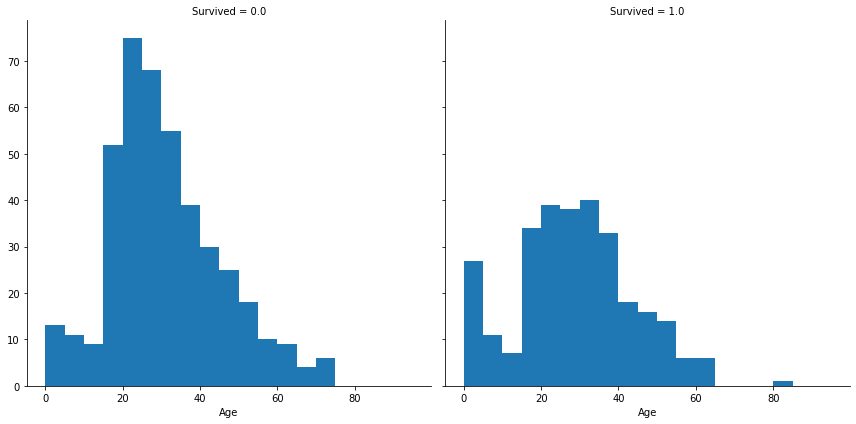

In [4]:

graph = sns.FacetGrid(bothdata,col='Survived',size=6)
graph.map(plt.hist,'Age',bins=range(0,100,5))

•	Do infants (Age <=4) have high survival rate?

**yes infants (Age <=4) have high survival rate, we can clearly see that in histogram**

•	Do infants (Age <=4) have high survival rate?

**yes infants (Age <=4) have high survival rate, we can clearly see that in the histogram**

•	Do oldest passengers (Age = 80) survive?

**yes, oldest passengers (Age = 80) survive, we can see that in the second histogram (survived=1.0) that  passenger with 80 years has a spike.**


•	Do oldest passengers (Age = 80) survive?


**yes, oldest passengers (Age = 80) survive, we can see that in the second histogram (survived=1.0) that passenger with 80 years has a spike.** 


•	Do large number of 15-25 year olds not survive? Based on your analysis of the histograms,

**yes, large no of passanger 15-25 did not make it. Histrogram with (survived=0.0) with shows huge spikes in the age between 15-25**


•	Should we consider Age in our model training? 
(If yes, then we should complete the Age feature for null values.)

**yes, we should consider the  age in our model as we see from the histrogram it 
is correlated with survival of the passanger .Also, we should fill in the null values simple way is to generate random numbers between mean and standard deviation.**  


•	Should we should band age groups?

**YES,we should band the age as it is continous data, we can band it and convert it into ordinal data use it for the model**

Q12: We can combine three features (age, Pclass, and survivied) for identifying correlations using a single plot. 

**This can be done with numerical and categorical features which have numeric values. Here is an example plot:**

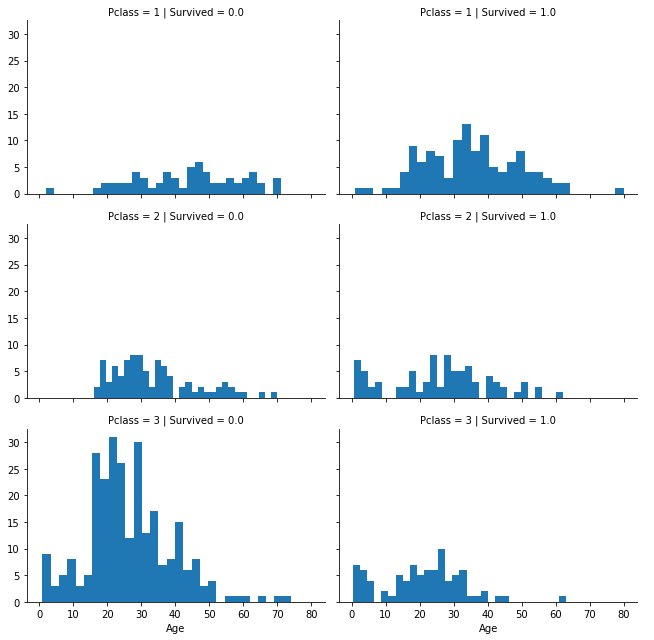

In [5]:
plot = sns.FacetGrid(bothdata,row='Pclass',col='Survived',aspect=1.5, size=3)
plot.map(plt.hist,'Age',bins=30)
plot.add_legend()


•	Does Pclass=3 have most passengers, however most did not survive?

**Yes Pclass=3 had the most passengers, Most of them did'nt survive confrims out
classifying**





•	Do infant passengers in Pclass=2 and Pclass=3 mostly survive?

**Yes, infant passengers in Pclass=2 and Pclass=3 mostly survive
we can see that in histrogram of Pclass=2, Pclass=3 and survived=1 has 
a spike in the infant**





•	Do most passengers in Pclass=1 survive?

**yes Pclass=1 passengers has mostly survided** 





•	Does Pclass vary in terms of Age distribution of passengers?

**Yes, Pclass vary in terms of Age distribution of passengers**





•	Should we consider Pclass for model training?

**yes, Pclass provides a lot of information about survival of the 
passanger, so we should consider it while training the model**


Q13: We want to correlate categorical features (with non-numeric values) and numeric features. We can consider correlating Embarked (Categorical non-numeric), Sex (Categorical non-numeric), Fare (Numeric continuous),with Survived (Categorical numeric). Please plot a histogram figure to illustrate the correlations of Embarked, Sex, Fare, and Survivied. Here is a sample plot:



/Users/rohitmarathe/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


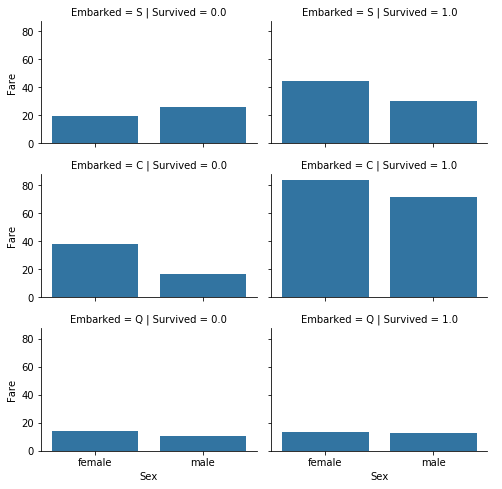

In [6]:
fare = sns.FacetGrid(bothdata,row='Embarked',col='Survived',size = 2.3,aspect=1.5)
fare.map(sns.barplot,'Sex','Fare',ci=None)
fare.add_legend()


•   Do higher fare paying passengers have better survival?

**yes Higher fare paying passengers have better survival rate, we can
clearly see that in the bar chart above**


•   Port of embarkation correlates with survival rates

**yes, Port of embarkation correlates with survival rates. this can be seen in bar chart correlating 1 and completing 2**

•   Should we consider banding fare feature?


**Yes we should consider banding fare feature as it has co relation with
survival** 


14: What is the rate of duplicates for the Ticket feature? 
Is there a correlation between Ticket and survival? Should we drop the Ticket feature?


**Ticket feature may be dropped from our analysis as it contains high ratio of duplicates (22%) 
and there may not be a correlation between Ticket and survival.**

In [7]:
train_df['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [8]:

print('Missing values:\n',bothdata.isna().sum())
duplicate_ticket=((891-681)/891)*100
print("duplicate values",duplicate_ticket,"%")

Missing values:
 Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64
duplicate values 23.56902356902357 %


Q15: Is the Cabin feature complete? How many null values there are in the Cabin features of the combined dataset of training and test dataset?
Should we drop the Cabin feature?


 **we can drop the lodge highlight as it profoundly fragmented and contains numerous invalid qualities in the preparation and testing dataset The Cabin include in not finish. Out of 1309 columns joining both train and test information just 295 lines contain Cabin include. Among those 186 are one of a kind. The quantity of invalid qualities are: 1014. We should drop the Cabin include.**

In [9]:
print('Missing values:\n',bothdata.isna().sum())


Missing values:
 Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64


In [10]:
bothdata.describe(include=["O"])

,Cabin,Embarked,Name,Sex,Ticket
count,295,1307,1309,1309,1309
unique,186,3,1307,2,929
top,C23 C25 C27,S,"Kelly, Mr. James",male,CA. 2343
freq,6,914,2,843,11


Q16: We can convert features which contain strings to numerical values.
This is required by most model algorithms. Doing so will also help us in achieving the feature completing goal. In this question ,
please convert Sex feature to a new feature called Gender where female=1 and male=0.



In [11]:

m = {'male' : 0, 'female' : 1}
for df in combine:
    df['Gender'] = df['Sex'].map(m).astype(int)
combine[0].head()




,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [12]:
bothdata.head()
#print("The value of Sex column are converted to 1 and 0")

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


Q17: We start estimating and completing features with missing or null values. 
    We will first do this for the Age feature. We can consider three methods to complete a numerical continuous feature. 
    A simple way is to generate random numbers between mean and standard deviation.
    More accurate way of guessing missing values is to use the K-Nearest Neighbor algorithm to select the top-K most similar data points, 
    and then use the top-K most similar data points to impute the missing values of ages.

In [13]:
print("using random value")

for df in combine:
    for i in range (0, len(df)):
        if np.isnan(df["Age"][i]) == True:
            df["Age"][i] = np.random.uniform(low=df['Age'].std(), high=df['Age'].median())

combine[1].head()






using random value


/Users/rohitmarathe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [14]:
print("using KNN value")

train_df['Age'] = train_df['Age'].apply(lambda x: np.random.randint(high = 29.699118, low = 14.526497) if np.isnan(x) else x)

imputer = KNNImputer(n_neighbors=2)
df_filled = imputer.fit_transform(train_df.loc[:,train_df.columns.isin(['Age','Fare','SibSp','Parch','Gender','Survived'])])
df_filled = pd.DataFrame(df_filled , columns =['Survived','Gender','Age','SibSp','Parch','Fare'] )

df_filled['Name'] = train_df['Name']
df_filled['Ticket'] = train_df['Ticket']
df_filled['Cabin'] = train_df['Cabin']
df_filled['Pclass'] = train_df['Pclass']
df_filled['PassengerId'] = train_df['PassengerId']
df_filled['Embarked'] = train_df['Embarked']

df_filled.head()

using KNN value


,Survived,Gender,Age,SibSp,Parch,Fare,Name,Ticket,Cabin,Pclass,PassengerId,Embarked
0,0.0,22.0,1.0,0.0,7.2500,0.0,"Braund, Mr. Owen Harris",A/5 21171,NaN,3,1,S
1,1.0,38.0,1.0,0.0,71.2833,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,C85,1,2,C
2,1.0,26.0,0.0,0.0,7.9250,1.0,"Heikkinen, Miss. Laina",STON/O2. 3101282,NaN,3,3,S
3,1.0,35.0,1.0,0.0,53.1000,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,C123,1,4,S
4,0.0,35.0,0.0,0.0,8.0500,0.0,"Allen, Mr. William Henry",373450,NaN,3,5,S


Q18: Completing a categorical feature: Embarked feature takes S, Q, C values based on port of embarkation. 
Our training dataset has some missing values. Please simply fill these with the most common occurrences.

In [15]:

freq_port = train_df.Embarked.dropna().mode()[0]
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


Q19: Completing and converting a numeric feature. Please complete the Fare feature for single missing value in test dataset using
mode to get the value that occurs most frequently for this feature.

In [16]:
test_df['Fare'].fillna(test_df['Fare'].dropna().mode(), inplace=True)
#bothdata[1]['Fare'] = combine[1]['Fare'].fillna(combine[1]['Fare'].dropna().mode())
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


Q20: Convert the Fare feature to ordinal values based on the FareBanddefined follows:Ordinal Fare IndicatorFareBandSurvivied 
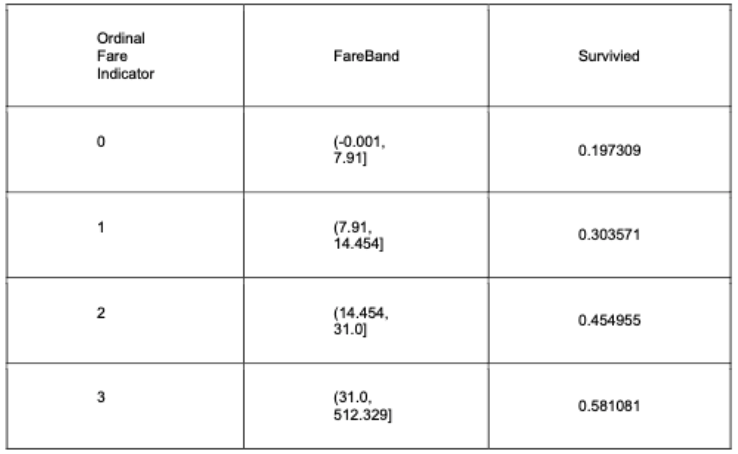

In [17]:

train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)


for dt in combine:
    dt.loc[ dt['Fare'] <= 7.91, 'Fare'] = 0
    dt.loc[(dt['Fare'] > 7.91) & (dt['Fare'] <= 14.454), 'Fare'] = 1
    dt.loc[(dt['Fare'] > 14.454) & (dt['Fare'] <= 31), 'Fare']   = 2
    dt.loc[ dt['Fare'] > 31, 'Fare'] = 3
    dt['Fare'] = dt['Fare'].astype(float)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,0.0,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,3.0,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,1.0,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,3.0,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,1.0,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,25.03856,0,0,330877,1.0,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00000,0,0,17463,3.0,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00000,3,1,349909,2.0,NaN,S,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00000,0,2,347742,1.0,NaN,S,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00000,1,0,237736,2.0,NaN,C,1
